Question 4.  Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor Sice your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding Correct spelling of investment types are - "Private Equity". "Seed Funding". "Debt Funding" and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm

# Importing required libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

# Loading and cleaning data

In [5]:
df = pd.read_csv("startup_funding.csv" , encoding = "UTF-8")

In [6]:
df.rename(columns = {'Date dd/mm/yyyy': "Date"} , inplace = True)
df.rename(columns = {'Startup Name': "StartupName"}, inplace = True)
df.rename(columns = {'Industry  Vertical':'IndustryVertical'}, inplace = True)
df.rename(columns = {'City  Location': "City"}, inplace = True)
df.rename(columns = {'Investors Name':"InvestorsName"}, inplace = True)
df.rename(columns = {'Amount in USD':'AmountInUSD'}, inplace = True)
df.rename(columns = {'InvestmentnType':'InvestmentType'}, inplace = True)

In [7]:
df.head()

,Sr No,Date,StartupName,Industry Vertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [42]:
# we can find the different wrong names using "unique()" function
df.StartupName.replace('Ola Cabs', 'Ola' , inplace = True)
df.StartupName.replace('Ola Electric', 'Ola' , inplace = True)
df.StartupName.replace('Olacabs', 'Ola' , inplace = True)
df.StartupName.replace('Flipkart.com', 'Flipkart' , inplace = True)
df.StartupName.replace('OyoRooms', 'Oyo' , inplace = True)
df.StartupName.replace('OYO Rooms', 'Oyo' , inplace = True)
df.StartupName.replace('Oyo Rooms', 'Oyo' , inplace = True)
df.StartupName.replace('Oyorooms', 'Oyo' , inplace = True)
df.StartupName.replace('OYOfit', 'Oyo' , inplace = True)
df.StartupName.replace('Paytm Marketplace', 'Paytm' , inplace = True)

df.InvestmentType.replace('Private Equity Round' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('Private Funding' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('Private' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('PrivateEquity' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('Private\\\\nEquity' , 'Private Equity' , inplace = True)
df.InvestmentType.replace('Seed Round' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('Seed' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('Seed Funding Round' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('Seed funding' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('Seed\\\\nFunding' , 'Seed Funding' , inplace = True)
df.InvestmentType.replace('Crowd funding' , 'Crowd Funding' , inplace = True)
df.InvestmentType.replace('Debt-Funding' , 'Debt Funding' , inplace = True)

# Solving problem statement

In [43]:
# Filtering the dataframe df based on the condition and making as new dataframe(temporary) as new_df
new_df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")]
investor = np.array(new_df.InvestorsName)
startup = np.array(new_df.StartupName)  #converting the columns into numpy array
#investors names has multiple names in one rows separated by 'commas' and ' and '. By using split function
#we will separate the names and store the investors name as key and companies name as value in dct dictionary
dct = {}
for i in range(len(investor)):
    name = str(investor[i]).split(', ')
    for j in range(len(name)):
        name1 = name[j].split(' and ')
        for k in range(len(name1)):
            name2 = name1[k].split(',')
            for n in name2:
                if n == " " or n == "" or n == "Undisclosed Investors" or n == "Undisclosed investors":
                    continue
                if n not in dct:
                    dct[n] = [startup[i]]
                else:
                    dct[n].append(startup[i])
#above dictionary contain multiple number of companies name against corresponding invrstors name. But we need
#investors name who invested in different companies. wso, we will use unique() or set() to make remove duplicate companies
# and find its number by using len().
for keys in dct:
    dct[keys] = len(set(dct[keys]))
# sorting dictionary     
sort_dct = {key: val for key , val in sorted(dct.items() , key = lambda ele:ele[1] , reverse = True) }
k = Counter(sort_dct)
# Extracting top 5 investors using counter
top_5 = k.most_common(5)
investors = []
count = []

for i in range(5):
    investors.append(top_5[i][0])
    count.append(top_5[i][1])

# Plotting Graph

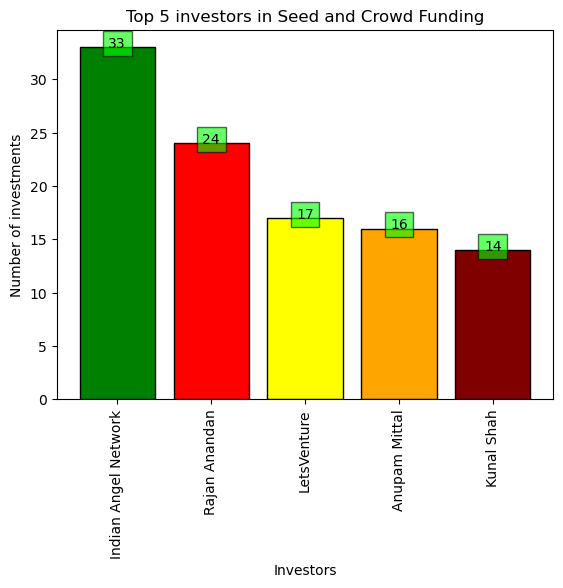

In [48]:
plt.bar(investors , count , color = ["green", "red" , "yellow" , "orange" , "maroon"] , edgecolor = "black")
plt.xticks(rotation = 90)
plt.xlabel("Investors")
plt.ylabel("Number of investments")
plt.title("Top 5 investors in Seed and Crowd Funding")
for i in range(len(investors)):
    plt.text(i, count[i] , count[i] , ha = "center" , bbox = dict(facecolor = "lime" , alpha = 0.6))
plt.show()